In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv', 'sub.csv']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [4]:
train.shape

(550068, 12)

In [5]:
train["Product_Category_2"].replace(np.NaN,0,inplace = True)
train["Product_Category_3"].replace(np.NaN,0,inplace = True)
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [6]:
train["dummy"] = 1
test["dummy"] = 0
combined = pd.concat([train,test])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df = pd.get_dummies(combined["Gender"])

In [8]:
combined = pd.concat([combined,df],axis=1)
df = pd.get_dummies(combined["City_Category"])
combined = pd.concat([combined,df],axis=1)

In [9]:
combined.head()
#combined.Age[combined.Age=="0-17"]="16"
#combined.Age[combined.Age=="55+"]="60"
combined.Age.replace("0-17",16, inplace= True)
combined.Age.replace("55+",60,inplace=True)
combined.Age[combined.Age=="26-35"] = 30
combined.Age[combined.Age=="46-50"] = 48
combined.Age.replace("51-55",53, inplace= True)
combined.Age[combined.Age=="36-45"] = 40
combined.Age[combined.Age=="18-25"] = 22
combined.Stay_In_Current_City_Years[combined.Stay_In_Current_City_Years=="4+"] = 6

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on 

In [10]:
combined.pop("Gender")
combined.pop("City_Category")

0         A
1         A
2         A
3         A
4         C
5         A
6         B
7         B
8         B
9         A
10        A
11        A
12        A
13        A
14        A
15        A
16        A
17        A
18        B
19        C
20        C
21        C
22        C
23        C
24        C
25        C
26        C
27        C
28        C
29        B
         ..
233569    B
233570    B
233571    A
233572    C
233573    C
233574    C
233575    C
233576    C
233577    C
233578    C
233579    B
233580    B
233581    C
233582    B
233583    B
233584    C
233585    B
233586    C
233587    A
233588    C
233589    C
233590    A
233591    B
233592    C
233593    B
233594    B
233595    B
233596    B
233597    C
233598    B
Name: City_Category, Length: 783667, dtype: object

In [11]:
combined.dtypes

Age                            object
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                     object
Purchase                      float64
Stay_In_Current_City_Years     object
User_ID                         int64
dummy                           int64
F                               uint8
M                               uint8
A                               uint8
B                               uint8
C                               uint8
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combined.Product_ID = le.fit_transform(combined.Product_ID)
#combined.User_ID = le.fit_transform(combined["User_ID"])

In [13]:
combined.Age=pd.to_numeric(combined.Age)
combined.Product_ID = pd.to_numeric(combined.Product_ID)
combined.Stay_In_Current_City_Years = pd.to_numeric(combined.Stay_In_Current_City_Years)

In [14]:
combined.dtypes

Age                             int64
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                      int64
Purchase                      float64
Stay_In_Current_City_Years      int64
User_ID                         int64
dummy                           int64
F                               uint8
M                               uint8
A                               uint8
B                               uint8
C                               uint8
dtype: object

In [15]:
train = combined[combined["dummy"]==1]
test = combined[combined["dummy"]==0]

In [16]:
test.pop("dummy")
train.pop("dummy")

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
550038    1
550039    1
550040    1
550041    1
550042    1
550043    1
550044    1
550045    1
550046    1
550047    1
550048    1
550049    1
550050    1
550051    1
550052    1
550053    1
550054    1
550055    1
550056    1
550057    1
550058    1
550059    1
550060    1
550061    1
550062    1
550063    1
550064    1
550065    1
550066    1
550067    1
Name: dummy, Length: 550068, dtype: int64

In [17]:
train.head()

,Age,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,F,M,A,B,C
0,16,0,10,3,0.0,0.0,684,8370.0,2,1000001,1,0,1,0,0
1,16,0,10,1,6.0,14.0,2406,15200.0,2,1000001,1,0,1,0,0
2,16,0,10,12,0.0,0.0,868,1422.0,2,1000001,1,0,1,0,0
3,16,0,10,12,14.0,0.0,844,1057.0,2,1000001,1,0,1,0,0
4,60,0,16,8,0.0,0.0,2769,7969.0,6,1000002,0,1,0,0,1


In [18]:
import seaborn as sns
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 15 columns):
Age                           550068 non-null int64
Marital_Status                550068 non-null int64
Occupation                    550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Product_ID                    550068 non-null int64
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    550068 non-null int64
User_ID                       550068 non-null int64
F                             550068 non-null uint8
M                             550068 non-null uint8
A                             550068 non-null uint8
B                             550068 non-null uint8
C                             550068 non-null uint8
dtypes: float64(3), int64(7), uint8(5)
memory usage: 48.8 MB


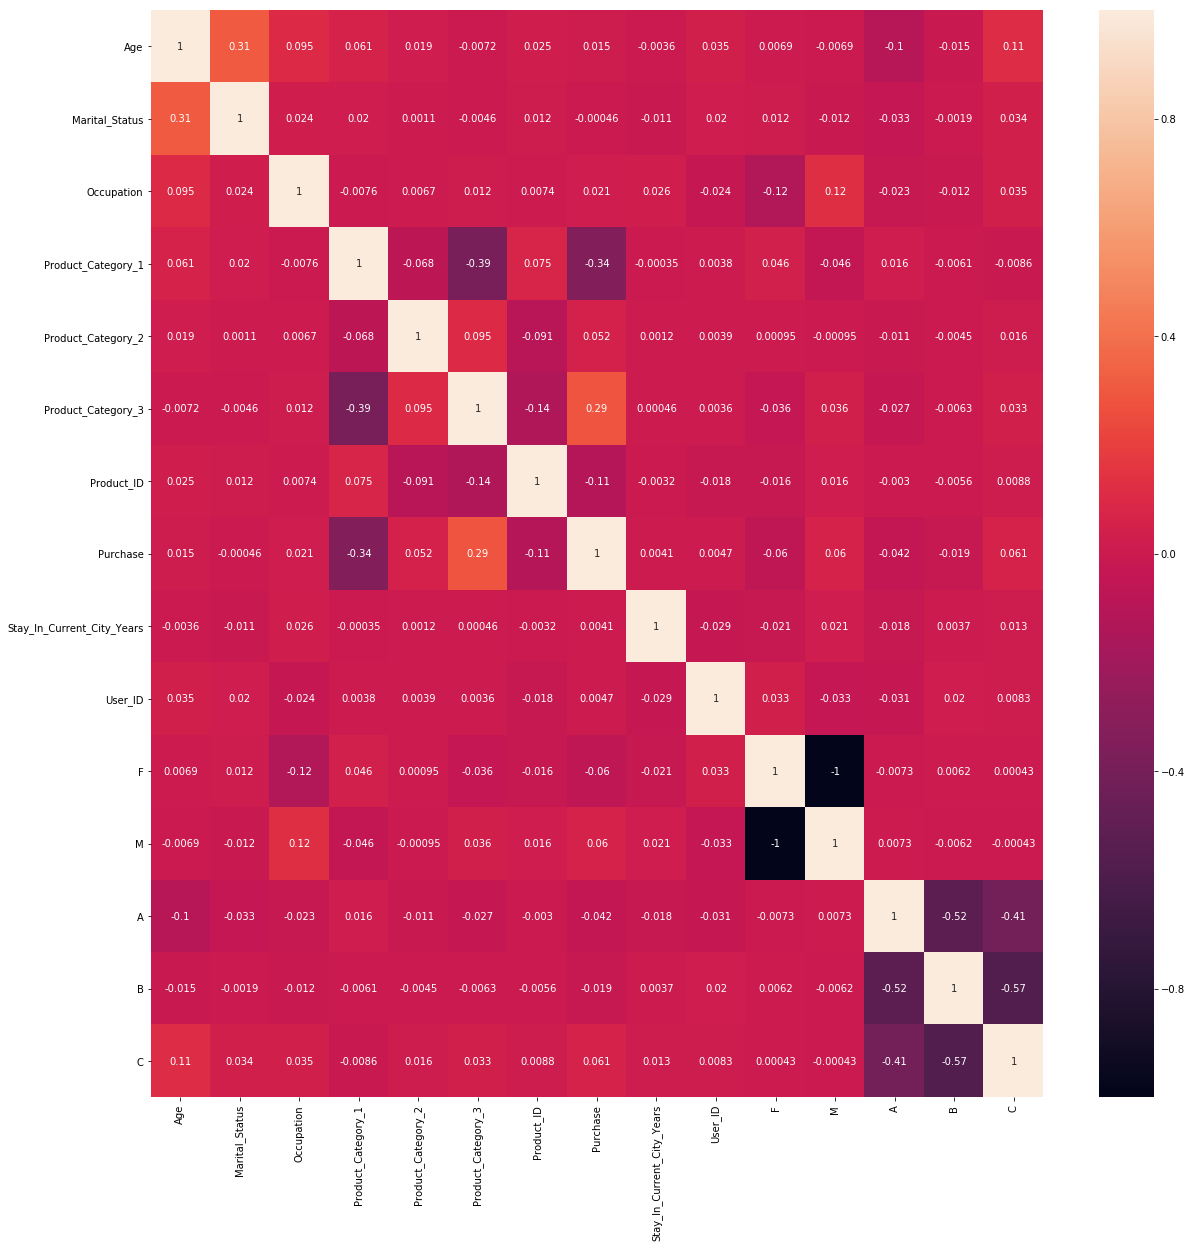

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot = True)

In [20]:
X = train.drop(labels="Purchase",axis = 1)
y = train.Purchase

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [23]:
params = {}
params["objective"] = "reg:linear"
params["eta"] = 0.03
params["min_child_weight"] = 10
params["subsample"] = 0.8
params["colsample_bytree"] = 0.7
params["silent"] = 1
params["max_depth"] = 10
#params["max_delta_step"]=2
params["seed"] = 0
 #params['eval_metric'] = "auc"
plst4 = list(params.items())
num_rounds4 = 1100



In [24]:
import xgboost as xgb
xgdmat=xgb.DMatrix(X_train,y_train)

final_gb4=xgb.train(plst4,xgdmat,num_rounds4)

tesdmat=xgb.DMatrix(X_test)
y_pred=final_gb4.predict(tesdmat)

In [25]:
from sklearn.metrics import mean_squared_error
from math import *
sqrt(mean_squared_error(y_pred,y_test))

2506.3372518000724

In [26]:
test.pop("Purchase")
tesdmat=xgb.DMatrix(test)
y_pred = final_gb4.predict(tesdmat)

In [27]:
sub = pd.read_csv("../input/sub.csv")

In [28]:
#test_pred = xg.predict(test.drop(labels = "Purchase",axis = 1))

In [29]:
sub["User_ID"] = test["User_ID"]

In [30]:
sub["Product_ID"] = le.inverse_transform(test["Product_ID"])

In [31]:
sub["Purchase"] = y_pred
#y_pred

In [32]:
sub.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,14966.683594
1,1000009,P00113442,10711.447266
2,1000010,P00288442,7157.709473
3,1000010,P00145342,2579.858643
4,1000011,P00053842,2353.594482


In [33]:
sub.to_csv('sub.csv',index=False)